1) Загрузить MNIST dataset.

In [11]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

2) Создать конволюционную модель.

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Convolution2D(20, 5, 5, border_mode='valid', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(20, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

3) Обучить классификатор для определения цифр от 0 до 9.

In [17]:
nb_epoch = 4

res = model.fit(X_train, Y_train, batch_size=128, nb_epoch=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 80s - loss: 0.0316 - acc: 0.9901 - val_loss: 0.0233 - val_acc: 0.9916
Epoch 2/4
60000/60000 [==============================] - 80s - loss: 0.0299 - acc: 0.9903 - val_loss: 0.0222 - val_acc: 0.9930
Epoch 3/4
60000/60000 [==============================] - 80s - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0221 - val_acc: 0.9931
Epoch 4/4
60000/60000 [==============================] - 80s - loss: 0.0270 - acc: 0.9914 - val_loss: 0.0198 - val_acc: 0.9945


4) Вывести графики loss и accuracy.

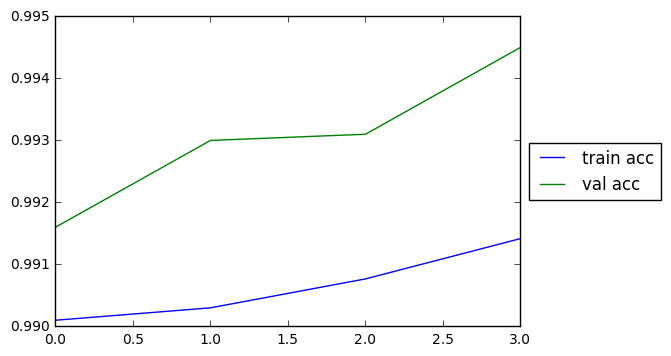

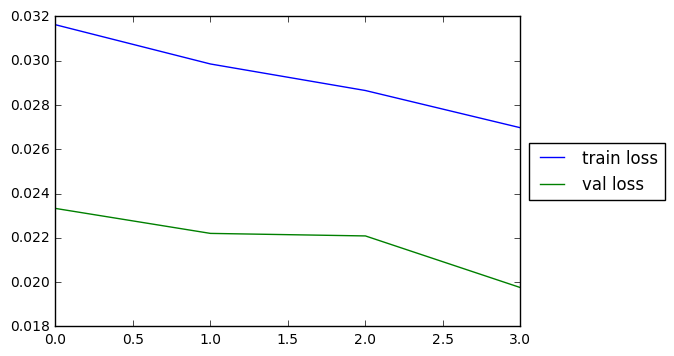

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

x = range(nb_epoch)

plt.plot(x, res.history['acc'], label="train acc")
plt.plot(x, res.history['val_acc'], label="val acc")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, res.history['loss'], label="train loss")
plt.plot(x, res.history['val_loss'], label="val loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))